In [155]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [156]:
# Parameters
learning_rate = 0.01
training_epochs = 3000
display_step = 100

In [157]:
data = np.loadtxt('ex1data1.txt')
m = data.shape[0]

# Training Data
train_X = np.reshape(data[:, 0], (m,))
train_Y = np.reshape(data[:, 1], (m,))

In [158]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")

In [159]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*m)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 0100 cost= 5.547502995 W= 0.8196171 b= -0.576123
Epoch: 0200 cost= 5.244796753 W= 0.8744449 b= -1.1193117
Epoch: 0300 cost= 5.033470154 W= 0.9201627 b= -1.572243
Epoch: 0400 cost= 4.885820389 W= 0.9582845 b= -1.9499198
Epoch: 0500 cost= 4.782563686 W= 0.99007237 b= -2.2648456
Epoch: 0600 cost= 4.710275173 W= 1.0165778 b= -2.5274384
Epoch: 0700 cost= 4.659599304 W= 1.0386791 b= -2.746402
Epoch: 0800 cost= 4.624021053 W= 1.0571072 b= -2.9289713
Epoch: 0900 cost= 4.598993301 W= 1.0724742 b= -3.0812137
Epoch: 1000 cost= 4.581351757 W= 1.085288 b= -3.208158
Epoch: 1100 cost= 4.568889141 W= 1.0959703 b= -3.3139977
Epoch: 1200 cost= 4.560055256 W= 1.1048784 b= -3.402249
Epoch: 1300 cost= 4.553771973 W= 1.112306 b= -3.4758286
Epoch: 1400 cost= 4.549290180 W= 1.1185005 b= -3.5372074
Epoch: 1500 cost= 4.546075344 W= 1.1236651 b= -3.5883703
Epoch: 1600 cost= 4.543759346 W= 1.1279716 b= -3.6310384
Epoch: 1700 cost= 4.542080402 W= 1.1315644 b= -3.6666293
Epoch: 1800 cost= 4.540858269 W= 1.13

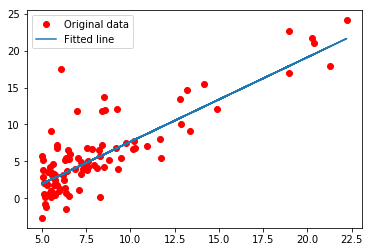

In [160]:
# 开始训练
with tf.Session() as sess:

    # 执行初始化操作
    sess.run(tf.global_variables_initializer())

    # 拟合模型数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # 每50次迭代后在控制台输出模型当前训练的loss以及权重大小
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # 画出拟合图像
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()    
